# Introduction to Data Science - Assignment 1: Regression Models

#### 1. Load Dataset

In [1]:
from google.colab import files
uploaded = files.upload()

Saving ENB2012_data.xlsx to ENB2012_data.xlsx


In [2]:
import pandas as pd

In [3]:
data = pd.read_excel('ENB2012_data.xlsx')

In [4]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


#### 2. Exploratory Data Analysis

In [5]:
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


All of the column have numerical values and can therefor be used for the further analysis without encoding them. We can also see that there are 768 rows and 10 columns, 8 of which being features and 2 being target columns. The column names need to be changed according to the website to ensure better interpretation and understanding of the variables.

In [6]:
data.rename(columns={'X1': 'Relative_Compactness', 'X2': 'Surface_Area', 'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height', 'X6': 'Orientation',
                     'X7': 'Glazing_Area', 'X8': 'Glazing_Area_Distribution','Y1': 'Heating_Load', 'Y2': 'Cooling_Load',}, inplace=True)

In [7]:
data.describe(include = 'all')

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


This overview tells us that the features have different numerical values and need to be normalized in order to further use them togehter in the regression algorithems. This will be done in the Data Preprocessing.

In [8]:
duplicated_rows = data[data.duplicated(keep=False)]
print(f'Number of duplicated rows: {len(duplicated_rows)}')

Number of duplicated rows: 0


There are no duplicated rows in the data, so no need to drop rows until now.

To gain more insight about the distribution of different values we will visualize them using distribution plots.

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

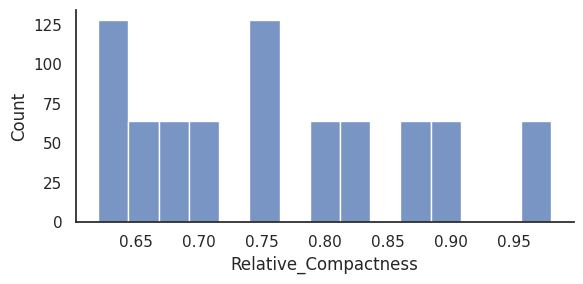

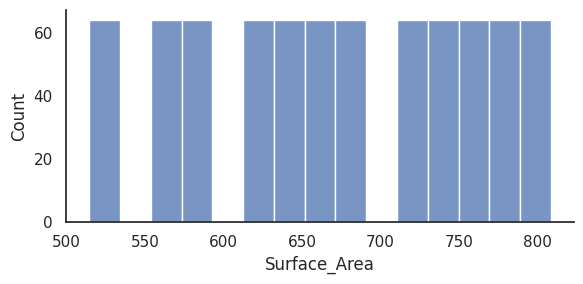

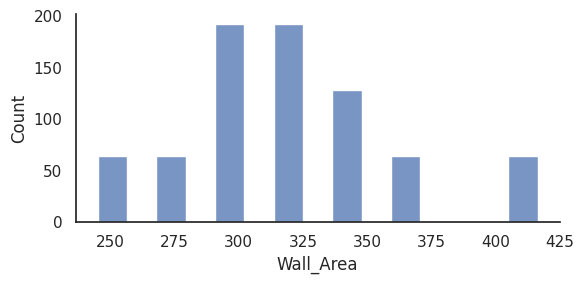

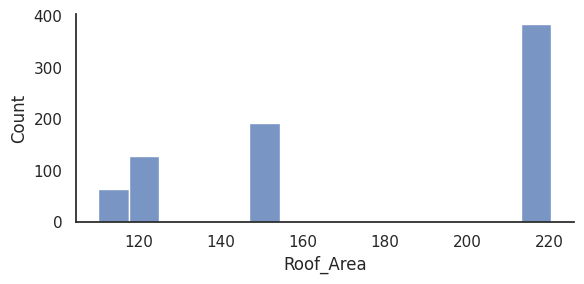

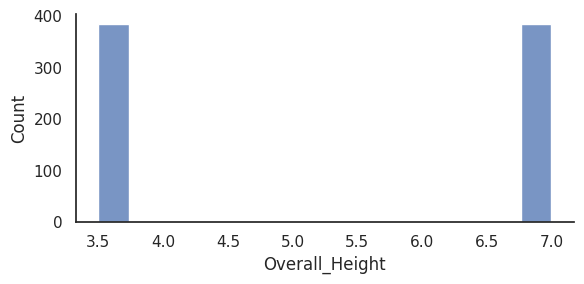

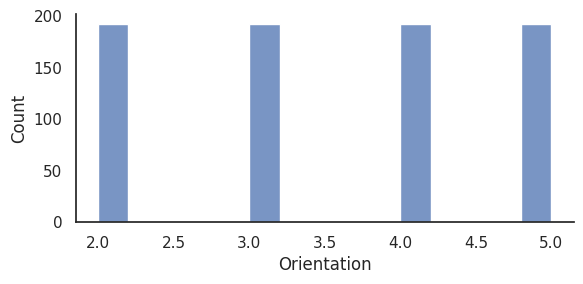

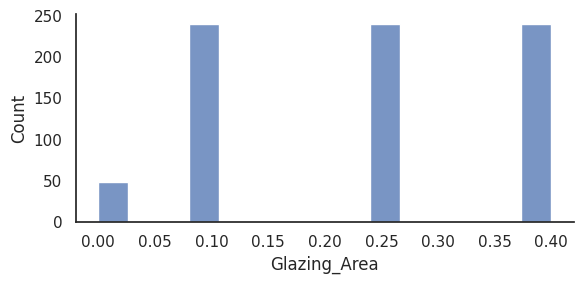

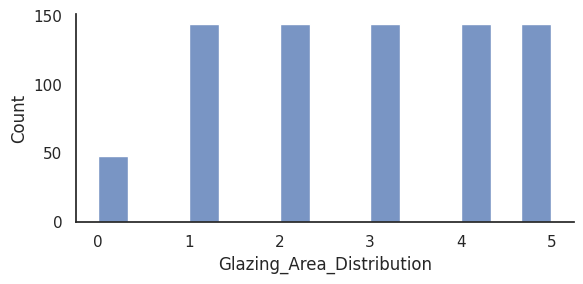

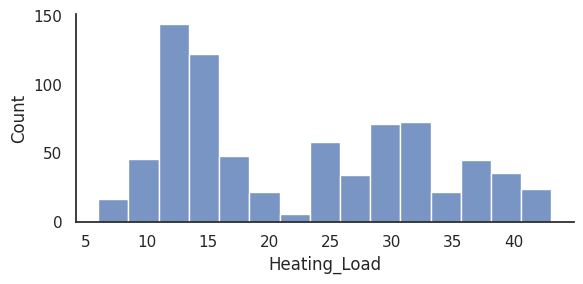

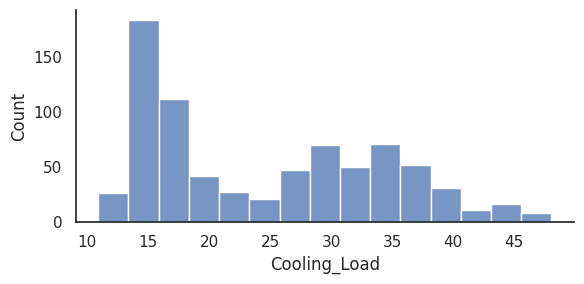

In [10]:
sns.set(style = 'white')
columns = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Orientation',
           'Glazing_Area', 'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load']
for c in columns:
    sns.displot(data = data, x = c, discrete = False, bins = 15, height = 3, aspect = 2)

These distribution plots show us that the two target variables heating load and cooling load have very similar distribution and also similar values to each other. Surface area has an equal distribution every value exists 60 times. As well as the glazing area and glazing area distribution, where the different values appear mainly around 230 and 145 times. The orientation has an equal distribution as well with 4 different values that appear around 180 times. There are also 2 distinct values for the overall height.

### 3. Preprocessing Data

In the first step of the Preprocessing we are checking the dataframe for missing values.

In [11]:
data.isnull().sum()

,0
Relative_Compactness,0
Surface_Area,0
Wall_Area,0
Roof_Area,0
Overall_Height,0
Orientation,0
Glazing_Area,0
Glazing_Area_Distribution,0
Heating_Load,0
Cooling_Load,0


Since there are no missing values in this dataframe we do not need to remove rows. Now we can look at the boxplots of every variable to identify potential outliers.

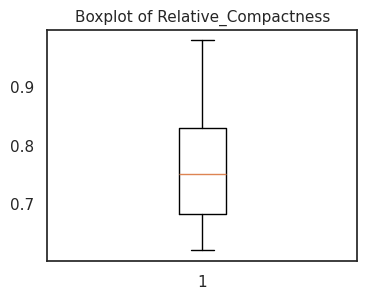

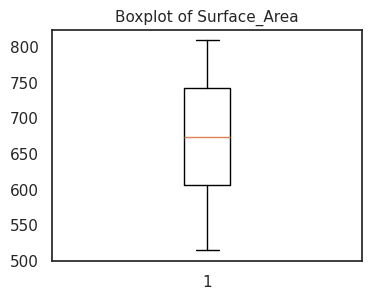

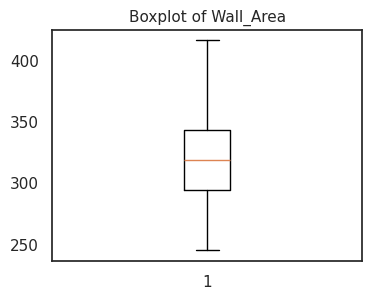

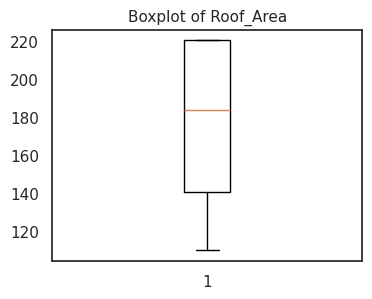

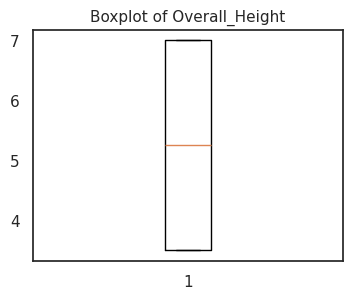

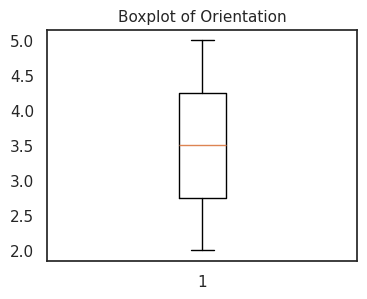

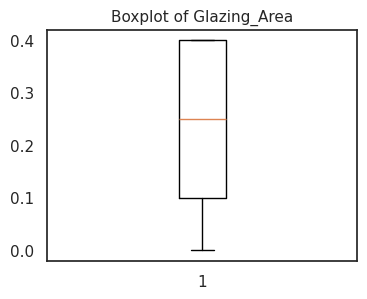

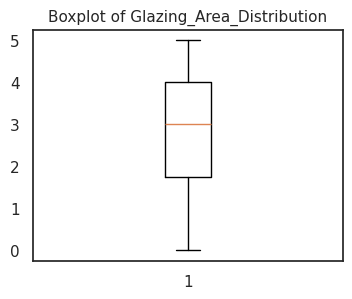

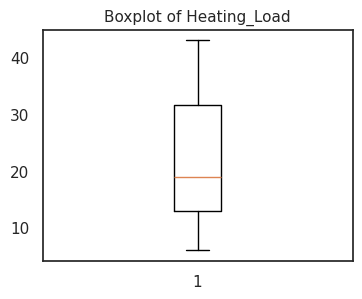

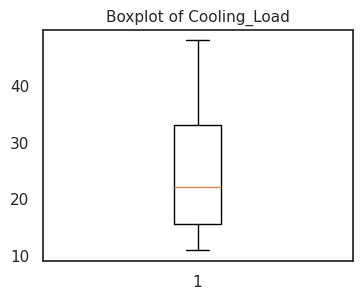

In [12]:
columns = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Orientation',
           'Glazing_Area', 'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load']
for c in columns:
  plt.figure(figsize=(4, 3))
  plt.boxplot(data[c])
  plt.title(f'Boxplot of {c}', fontsize=11)
  plt.show()

The boxplots show no outliers.

As already mentioned in the EDA the values of the different features and target variables are very different and need to be scaled in order to further use them for the regression algorithems and not falsify the analysis.

In [13]:
from sklearn.preprocessing import MinMaxScaler
data = pd.DataFrame(MinMaxScaler().fit_transform(data), columns=data.columns)

In [14]:
data

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,0.257212,0.280905
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,0.257212,0.280905
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,0.257212,0.280905
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,0.257212,0.280905
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,0.399838,0.468085
...,...,...,...,...,...,...,...,...,...,...
763,0.055556,0.916667,0.571429,1.000000,0.0,1.000000,1.0,1.0,0.320032,0.282790
764,0.000000,1.000000,0.714286,1.000000,0.0,0.000000,1.0,1.0,0.283904,0.161056
765,0.000000,1.000000,0.714286,1.000000,0.0,0.333333,1.0,1.0,0.281208,0.167250
766,0.000000,1.000000,0.714286,1.000000,0.0,0.666667,1.0,1.0,0.282286,0.153784


To gain more insight about the different values we will visualize the relationships between the independent variables and the target variable
using plots that show how the values of a feature change with the index.

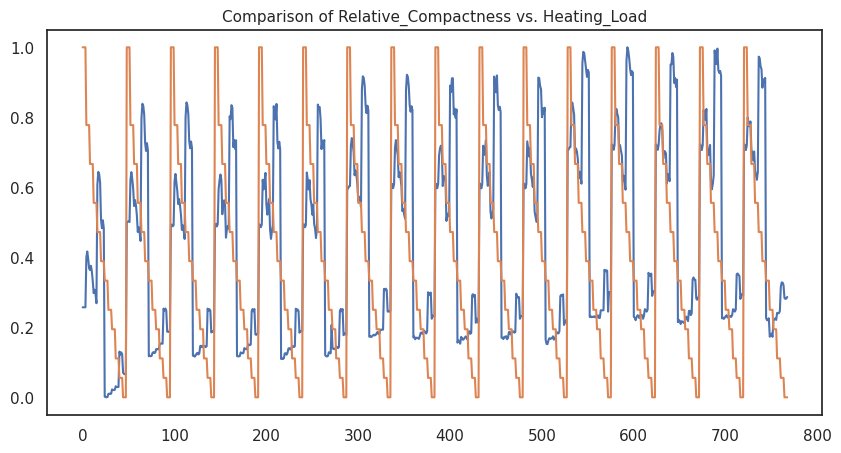

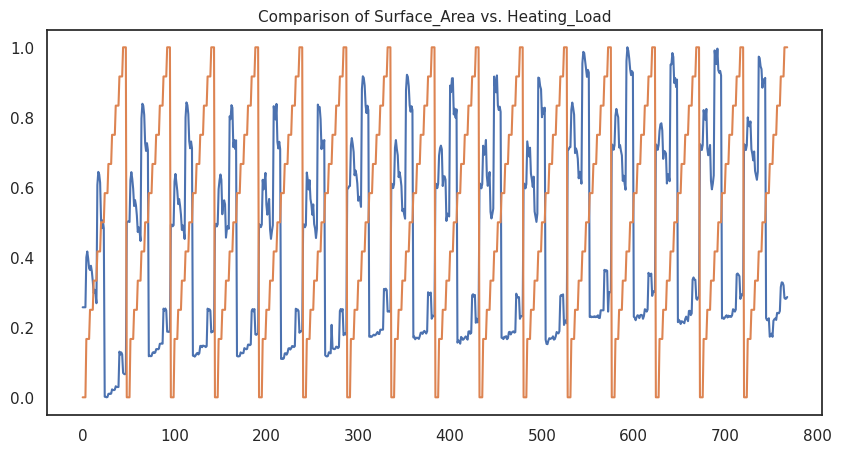

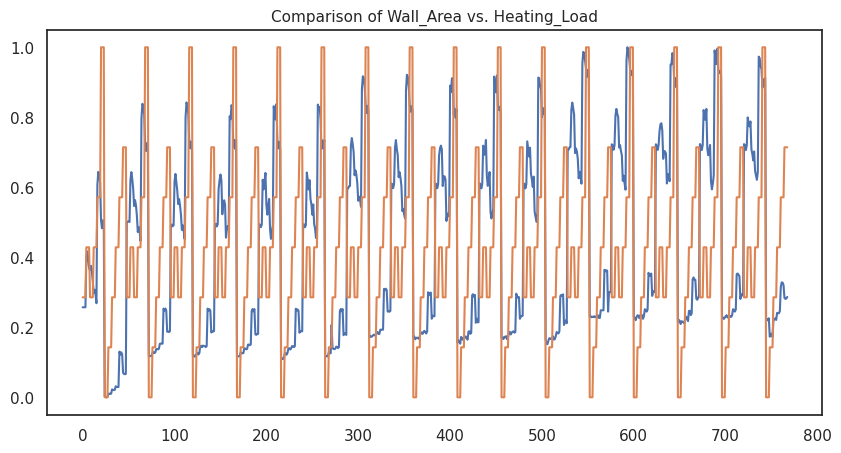

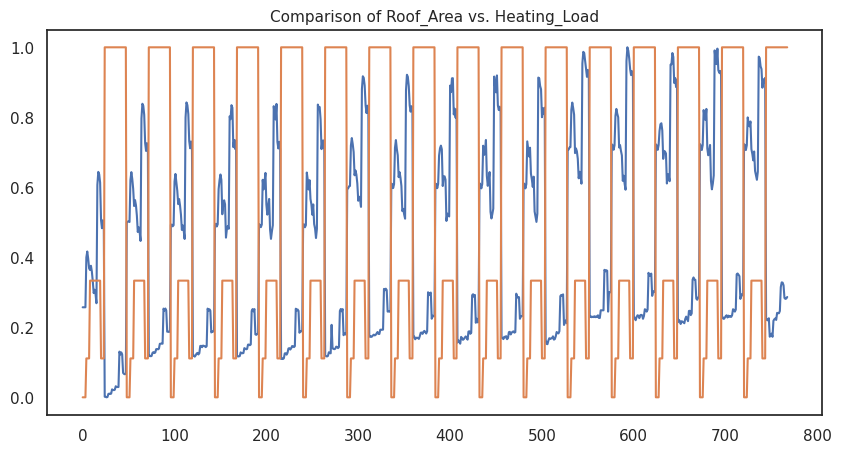

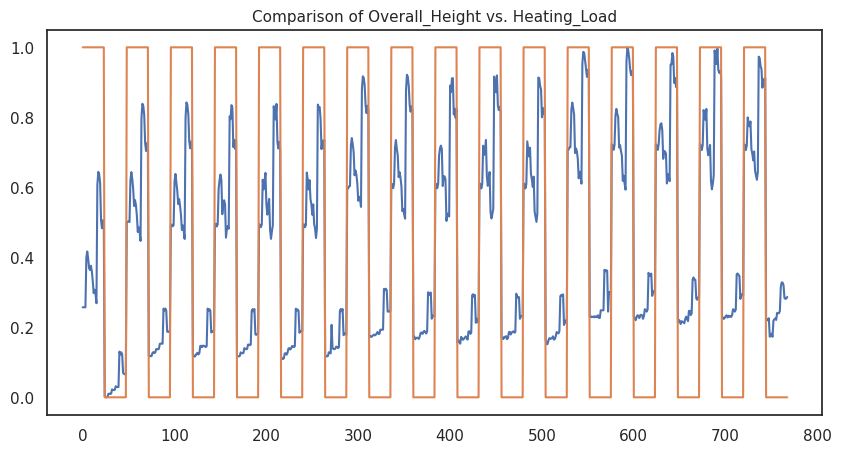

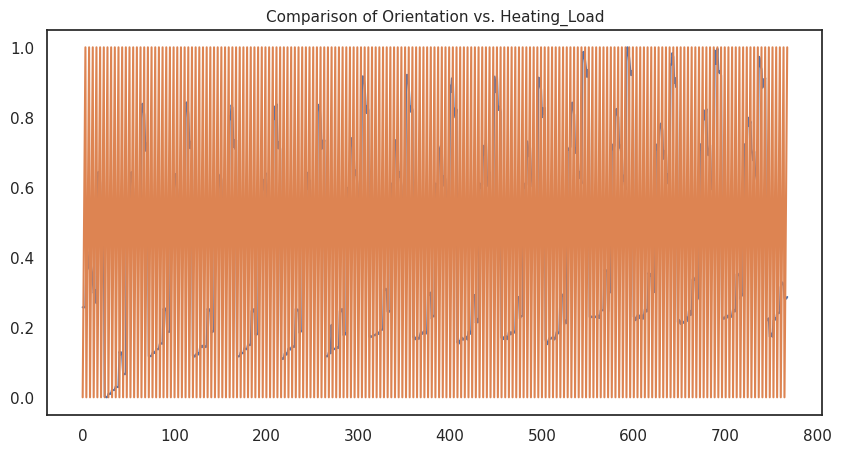

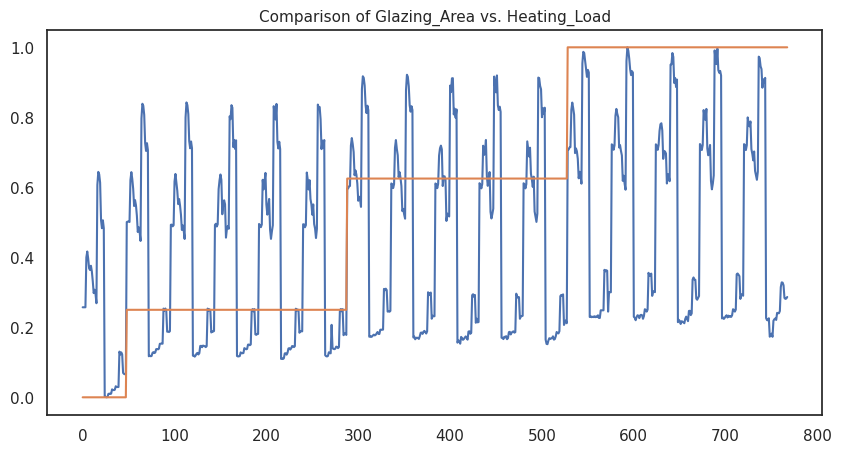

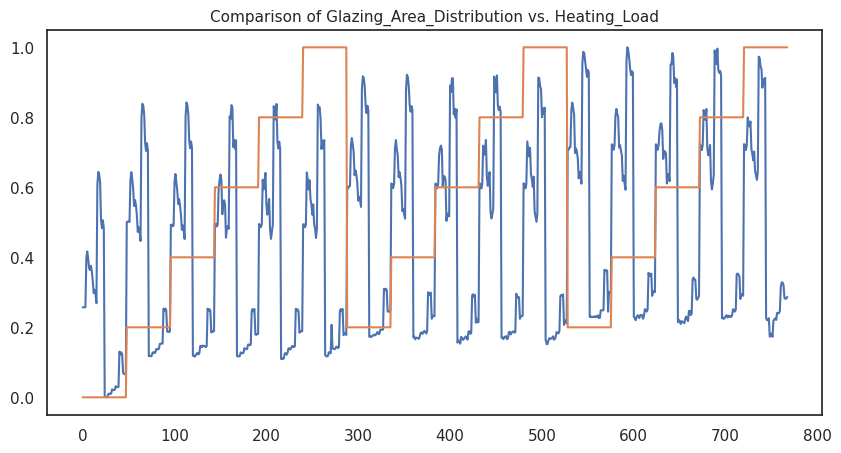

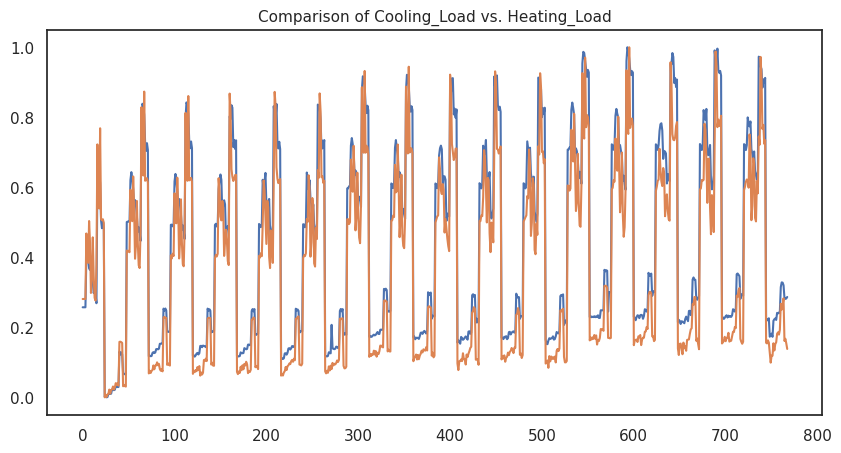

In [15]:
columns = data.drop(columns=['Heating_Load'])
targets = data['Heating_Load']
for c in columns:
  plt.figure(figsize=(10, 5))

  y1 = data['Heating_Load']
  y2 = data[c]
  plt.title(f'Comparison of {c} vs. Heating_Load', fontsize=11)
  plt.plot(y1)
  plt.plot(y2)

  plt.show()

These plots show a high similarity in the graphs of the target variable heating load and the features relative compactness, surface area, wall area, roof area and overall height. The other target variable cooling load is slightly lower than the heating load but apart from that the two variables are very similar.

The next step is to check the different variables for multicollinearity which will be done by using the Variance Inflation Factor (VIF). It quantifies multicollinearity between the independent variables.

Usually a VIF > 10 indicates a high multicolliniarity and it is advisable to drop these features.

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

features = data.drop(columns=['Heating_Load', 'Cooling_Load'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

vif_data = pd.DataFrame()
vif_data["Feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(scaled_features, i) for i in range(scaled_features.shape[1])]

print("Variance Inflation Factor (VIF):")
print(vif_data)

Variance Inflation Factor (VIF):
                     Feature         VIF
0       Relative_Compactness  105.524054
1               Surface_Area         inf
2                  Wall_Area         inf
3                  Roof_Area         inf
4             Overall_Height   31.205474
5                Orientation    1.000000
6               Glazing_Area    1.047508
7  Glazing_Area_Distribution    1.047508


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


For these features it can be seen that surface area, wall area and roof area have infinite colliniarity, which is why we will remove these features and calculate the VIF again to see if it reduces for the other values.

In [17]:
data_reduced = data.drop(['Surface_Area', 'Wall_Area', 'Roof_Area'], axis='columns')
print(data_reduced)

     Relative_Compactness  Overall_Height  Orientation  Glazing_Area  \
0                1.000000             1.0     0.000000           0.0   
1                1.000000             1.0     0.333333           0.0   
2                1.000000             1.0     0.666667           0.0   
3                1.000000             1.0     1.000000           0.0   
4                0.777778             1.0     0.000000           0.0   
..                    ...             ...          ...           ...   
763              0.055556             0.0     1.000000           1.0   
764              0.000000             0.0     0.000000           1.0   
765              0.000000             0.0     0.333333           1.0   
766              0.000000             0.0     0.666667           1.0   
767              0.000000             0.0     1.000000           1.0   

     Glazing_Area_Distribution  Heating_Load  Cooling_Load  
0                          0.0      0.257212      0.280905  
1            

In [18]:
features = data_reduced.drop(columns=['Heating_Load', 'Cooling_Load'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

vif_data = pd.DataFrame()
vif_data["Feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(scaled_features, i) for i in range(scaled_features.shape[1])]

print("Variance Inflation Factor (VIF):")
print(vif_data)

Variance Inflation Factor (VIF):
                     Feature       VIF
0       Relative_Compactness  3.176273
1             Overall_Height  3.176273
2                Orientation  1.000000
3               Glazing_Area  1.047508
4  Glazing_Area_Distribution  1.047508


The multicolliniarity went down so now we can continue with our different regression models.

### 4. Model Selection and Evaluation

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [20]:
from sklearn.model_selection import train_test_split

The first step is to define features and target values for the Regression models. Here we are using the dataframe from the preprocessing as our features X and our target variable Y.

In [21]:
X = data_reduced.drop(['Heating_Load', 'Cooling_Load'], axis='columns')
Y = data_reduced[['Heating_Load', 'Cooling_Load']]

With these dataframes we are now using train_test_split to get 80% training and 20% testing data. The random state is set to 42 so the data does not change everytime the notebook is run.

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

#### 4.1 Linear Regression

Since Linear Regression works best for dataframes with a strong linear relationship we can use it for the analysis, atleast relative compactness and overall height are linearly related to the target variable. It is also a simple algorithem that is easy interpretable. In the preprocessing we made sure to minimize the multicollinearity an scaled the features, so we can use Linear Regression for this data.

In [23]:
from sklearn.linear_model import LinearRegression
LinearR = LinearRegression()

In [24]:
LinearR.fit(X_train, Y_train)

LinearRegression()

In [25]:
LinearR.score(X_test, Y_test)

0.8983883908930538

#### 4.2 Ridge Regression

As second algorithem we will use Ridge Regression, it handles multicollinearity well and is suitable when all features are relevant but highly correlated. The VIF is lower than 10 but still quite high especially of relative compactness and overall height which is why we can use this algorithem for this data and get good results.

In [26]:
from sklearn.linear_model import Ridge
RidgeR = Ridge(random_state = 42)

In [27]:
RidgeR.fit(X_train, Y_train)

Ridge(random_state=42)

In [28]:
RidgeR.score(X_test, Y_test)

0.897102529716651

#### 4.3 Lasso Regression

Lasso Regression performs feature selection by shrinking less important feature coefficients to zero. We can use this here, since some features seem to have more correlation than other. We are using MultiTaskLassoCV to find the best alpha for this data.

In [29]:
from sklearn.linear_model import MultiTaskLassoCV
LassoR = MultiTaskLassoCV(alphas=None,  # Automatically chooses a range of alphas
                   cv=5,         # 5-fold cross-validation
                   random_state=42)

# Fit LassoCV on the training data
LassoR.fit(X_train, Y_train)

# Best alpha identified
best_alpha = LassoR.alpha_
print(f"Optimal alpha: {best_alpha}")

Optimal alpha: 0.0001658745089953253


In [30]:
LassoR.score(X_test, Y_test)

0.8982506939098952

#### 4.4 Evaluation of the algorithems

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from prettytable import PrettyTable

myTable = PrettyTable(["Model", "Mean Squared Error", "Mean Absolute Error", "R2 - Score"])

models = [LinearR, RidgeR, LassoR]
models_name = ['Linear_Regression', 'Ridge_Regression', 'Lasso_Regression']

for model in models:
  y_pred = model.predict(X_test)

  mse = mean_squared_error(Y_test, y_pred)
  mae = mean_absolute_error(Y_test, y_pred)
  r2 = r2_score(Y_test, y_pred)
  x = models.index(model)

  myTable.add_row([models_name[x], mse, mae, r2])

print(myTable)

+-------------------+----------------------+---------------------+--------------------+
|       Model       |  Mean Squared Error  | Mean Absolute Error |     R2 - Score     |
+-------------------+----------------------+---------------------+--------------------+
| Linear_Regression | 0.007238583508413481 | 0.06289262809075986 | 0.8983883908930538 |
|  Ridge_Regression | 0.007328835688357505 | 0.06278651173178551 | 0.897102529716651  |
|  Lasso_Regression | 0.007247829927642972 | 0.06279972426510586 | 0.8982506939098952 |
+-------------------+----------------------+---------------------+--------------------+


All of these algorithems work well with the data and work almost equally good. From the metrics we can see that the Linear Regression performs the best and the Lasso Regression is slightly better than the Ridge Regression.

#### 4.5 Recommendations for the future

*  Linear Regression is the best model for predicting future heating load and cooling load values since it has the best prediction accuracy. Therefor it should be used for further predictions.
*  The effect of features like Orientation and Glazing_Area_Distribution should be monitored, as they may have nonlinear impacts in different seasons for example.

*  In the future it makes sense to optimize glazing area and its distribution to minimize cooling loads in summer and heating loads in winter.
*  Switching to Lasso Regression if feature noise or multicollinearity is observed in future datasets should be kept in mind.

### 6. Neural Network Integration

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#### 6.1  Neural Network

Since the regression is already getting very good results it should be enough to create a small Neural Network.

The input number of input layers is set to the number of columns in the training data set of features.
The first hidden layer has 128 neurons and the second hidden layer has 64 neurons which is a common way to design Neural Networks. The activation function is Rectified Linear Unit because it is very simple like our data.
The output layer has two neurons since there are two target variables heating load and cooling load.

In [33]:
NN = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),  # First hidden layer
    Dense(64, activation='relu'),  # Second hidden layer
    Dense(2)  # Output layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


The next step is to compile the model with Adam optimizer the MSE loss function for regression. There is also an early stopping integrated which starts getting activated after 50 from 100 epochs and if the validation loss does not decrease for 5 rounds the training is stopped. At last the model is trained with the training data.

In [34]:
NN.compile(optimizer=Adam(), loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, start_from_epoch=40)

NN.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1017 - val_loss: 0.0354
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0234 - val_loss: 0.0140
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0133 - val_loss: 0.0110
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0091 - val_loss: 0.0087
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0086 - val_loss: 0.0077
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0082 - val_loss: 0.0073
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0082 - val_loss: 0.0072
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0078 - val_loss: 0.0074
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0064 - val_loss: 0.0073
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - val_loss: 0.0070
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - val_loss: 0.0069
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

The model is evaluated based on test data. As we can see the loss is very low, which indicates a high performing Neural Network.

In [35]:
loss = NN.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0068 
Test Loss: 0.0059538427740335464


#### 6.2 Performance Comparison

In [36]:
myTable = PrettyTable(["Model", "Mean Squared Error", "Mean Absolute Error", "R2 - Score"])

models = [LinearR, RidgeR, LassoR, NN]
models_name = ['Linear_Regression', 'Ridge_Regression','Lasso_Regression', 'Neural_Network']

for model in models:
  y_pred = model.predict(X_test)

  mse = mean_squared_error(Y_test, y_pred)
  mae = mean_absolute_error(Y_test, y_pred)
  r2 = r2_score(Y_test, y_pred)
  x = models.index(model)

  myTable.add_row([models_name[x], mse, mae, r2])

print(myTable)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
+-------------------+----------------------+---------------------+--------------------+
|       Model       |  Mean Squared Error  | Mean Absolute Error |     R2 - Score     |
+-------------------+----------------------+---------------------+--------------------+
| Linear_Regression | 0.007238583508413481 | 0.06289262809075986 | 0.8983883908930538 |
|  Ridge_Regression | 0.007328835688357505 | 0.06278651173178551 | 0.897102529716651  |
|  Lasso_Regression | 0.007247829927642972 | 0.06279972426510586 | 0.8982506939098952 |
|   Neural_Network  | 0.00595384280768459  | 0.05475823401252698 | 0.9156761169433594 |
+-------------------+----------------------+---------------------+--------------------+


The Neural Network functions slightly better than the Regression models because it has lower MSE and MAE and a higher r2 - Score. The scores show a very high accuracy for all of the models.